In [1]:
import pandas as pd
import numpy as np
import operator, statistics
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# Install the package

In [ ]:
!pip install msda

# Import time-series data

In [2]:
df = pd.read_csv('Canadian_climate_history.csv')
df.shape

(29221, 27)

In [3]:
df.columns

Index(['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO',
       'MEAN_TEMPERATURE_VANCOUVER', 'TOTAL_PRECIPITATION_VANCOUVER',
       'MEAN_TEMPERATURE_WHITEHORSE', 'TOTAL_PRECIPITATION_WHITEHORSE',
       'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG'],
      dtype='object')

In [4]:
df.head()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29221 entries, 0 to 29220
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LOCAL_DATE                      29221 non-null  object 
 1   MEAN_TEMPERATURE_CALGARY        29032 non-null  float64
 2   TOTAL_PRECIPITATION_CALGARY     29048 non-null  float64
 3   MEAN_TEMPERATURE_EDMONTON       21564 non-null  float64
 4   TOTAL_PRECIPITATION_EDMONTON    21575 non-null  float64
 5   MEAN_TEMPERATURE_HALIFAX        22057 non-null  float64
 6   TOTAL_PRECIPITATION_HALIFAX     21995 non-null  float64
 7   MEAN_TEMPERATURE_MONCTON        26885 non-null  float64
 8   TOTAL_PRECIPITATION_MONCTON     26454 non-null  float64
 9   MEAN_TEMPERATURE_MONTREAL       28466 non-null  float64
 10  TOTAL_PRECIPITATION_MONTREAL    28491 non-null  float64
 11  MEAN_TEMPERATURE_OTTAWA         29145 non-null  float64
 12  TOTAL_PRECIPITATION_OTTAWA      

# Check missing values with missing function

In [6]:
print("Missing information for whole dataset")
print("Missing by row", df.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row LOCAL_DATE                           0
MEAN_TEMPERATURE_CALGARY           189
TOTAL_PRECIPITATION_CALGARY        173
MEAN_TEMPERATURE_EDMONTON         7657
TOTAL_PRECIPITATION_EDMONTON      7646
MEAN_TEMPERATURE_HALIFAX          7164
TOTAL_PRECIPITATION_HALIFAX       7226
MEAN_TEMPERATURE_MONCTON          2336
TOTAL_PRECIPITATION_MONCTON       2767
MEAN_TEMPERATURE_MONTREAL          755
TOTAL_PRECIPITATION_MONTREAL       730
MEAN_TEMPERATURE_OTTAWA             76
TOTAL_PRECIPITATION_OTTAWA          81
MEAN_TEMPERATURE_QUEBEC           1214
TOTAL_PRECIPITATION_QUEBEC        1227
MEAN_TEMPERATURE_SASKATOON        2473
TOTAL_PRECIPITATION_SASKATOON     3755
MEAN_TEMPERATURE_STJOHNS           808
TOTAL_PRECIPITATION_STJOHNS        822
MEAN_TEMPERATURE_TORONTO            74
TOTAL_PRECIPITATION_TORONTO         80
MEAN_TEMPERATURE_VANCOUVER          53
TOTAL_PRECIPITATION_VANCOUVER       55
MEAN_TEMPERATURE_WHITEHORSE       1691
TOTAL_PRECI

# Impute missing values with impute function (modes=0,1, 2, else backfill)
### 0: impute with zero, 1: impute with mean, 2: impute with median, else impute with backfill method

In [7]:
df_no_na = ExploratoryDataAnalysis.impute(df=df, modes=1)

In [8]:
print("Missing information for whole dataset")
print("Missing by row", df_no_na.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df_no_na.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row LOCAL_DATE                        0
MEAN_TEMPERATURE_CALGARY          0
TOTAL_PRECIPITATION_CALGARY       0
MEAN_TEMPERATURE_EDMONTON         0
TOTAL_PRECIPITATION_EDMONTON      0
MEAN_TEMPERATURE_HALIFAX          0
TOTAL_PRECIPITATION_HALIFAX       0
MEAN_TEMPERATURE_MONCTON          0
TOTAL_PRECIPITATION_MONCTON       0
MEAN_TEMPERATURE_MONTREAL         0
TOTAL_PRECIPITATION_MONTREAL      0
MEAN_TEMPERATURE_OTTAWA           0
TOTAL_PRECIPITATION_OTTAWA        0
MEAN_TEMPERATURE_QUEBEC           0
TOTAL_PRECIPITATION_QUEBEC        0
MEAN_TEMPERATURE_SASKATOON        0
TOTAL_PRECIPITATION_SASKATOON     0
MEAN_TEMPERATURE_STJOHNS          0
TOTAL_PRECIPITATION_STJOHNS       0
MEAN_TEMPERATURE_TORONTO          0
TOTAL_PRECIPITATION_TORONTO       0
MEAN_TEMPERATURE_VANCOUVER        0
TOTAL_PRECIPITATION_VANCOUVER     0
MEAN_TEMPERATURE_WHITEHORSE       0
TOTAL_PRECIPITATION_WHITEHORSE    0
MEAN_TEMPERATURE_WINNIPEG         0
TOTAL_PRECI

In [9]:
df_no_na.columns

Index(['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO',
       'MEAN_TEMPERATURE_VANCOUVER', 'TOTAL_PRECIPITATION_VANCOUVER',
       'MEAN_TEMPERATURE_WHITEHORSE', 'TOTAL_PRECIPITATION_WHITEHORSE',
       'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG'],
      dtype='object')

# Input data to ANOMALY DETECTOR
### we are inputing data with no missing values, removal of unsignificant fields, assert timestamp field, etc.

In [10]:
anamoly_data, anamoly_df = Anamoly.read_data(data=df_no_na, column_index_to_drop=0, timestamp_column_index=0)

In [11]:
anamoly_data.columns

Index(['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO',
       'MEAN_TEMPERATURE_VANCOUVER', 'TOTAL_PRECIPITATION_VANCOUVER',
       'MEAN_TEMPERATURE_WHITEHORSE', 'TOTAL_PRECIPITATION_WHITEHORSE',
       'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG'],
      dtype='object')

In [12]:
anamoly_data.head()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,-11.4,0.5,2.311584,1.246239,6.565997,3.976417,-8.9,0.0,6.675386,2.65607,...,5.00718,4.10222,-8.9,0.0,8.9,5.8,-0.41871,0.729778,-20.9,0.0
1,-12.0,0.5,2.311584,1.246239,6.565997,3.976417,-14.5,0.0,6.675386,2.65607,...,5.00718,4.10222,-13.1,0.3,9.7,7.1,-0.41871,0.729778,-18.4,0.0
2,-12.0,1.0,2.311584,1.246239,6.565997,3.976417,-11.1,0.0,6.675386,2.65607,...,5.00718,4.10222,-6.1,0.0,7.8,1.0,-0.41871,0.729778,-22.0,0.0
3,-11.4,0.8,2.311584,1.246239,6.565997,3.976417,-11.1,0.3,6.675386,2.65607,...,5.00718,4.10222,-6.4,0.5,8.1,0.5,-0.41871,0.729778,-20.3,0.0
4,-13.1,0.5,2.311584,1.246239,6.565997,3.976417,-8.1,0.0,6.675386,2.65607,...,5.00718,4.10222,-7.2,16.5,7.0,0.8,-0.41871,0.729778,-18.7,0.0


In [13]:
anamoly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29221 entries, 0 to 29220
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MEAN_TEMPERATURE_CALGARY        29221 non-null  float64
 1   TOTAL_PRECIPITATION_CALGARY     29221 non-null  float64
 2   MEAN_TEMPERATURE_EDMONTON       29221 non-null  float64
 3   TOTAL_PRECIPITATION_EDMONTON    29221 non-null  float64
 4   MEAN_TEMPERATURE_HALIFAX        29221 non-null  float64
 5   TOTAL_PRECIPITATION_HALIFAX     29221 non-null  float64
 6   MEAN_TEMPERATURE_MONCTON        29221 non-null  float64
 7   TOTAL_PRECIPITATION_MONCTON     29221 non-null  float64
 8   MEAN_TEMPERATURE_MONTREAL       29221 non-null  float64
 9   TOTAL_PRECIPITATION_MONTREAL    29221 non-null  float64
 10  MEAN_TEMPERATURE_OTTAWA         29221 non-null  float64
 11  TOTAL_PRECIPITATION_OTTAWA      29221 non-null  float64
 12  MEAN_TEMPERATURE_QUEBEC         

In [14]:
anamoly_df.columns

Index(['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO',
       'MEAN_TEMPERATURE_VANCOUVER', 'TOTAL_PRECIPITATION_VANCOUVER',
       'MEAN_TEMPERATURE_WHITEHORSE', 'TOTAL_PRECIPITATION_WHITEHORSE',
       'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG'],
      dtype='object')

In [15]:
anamoly_df.head()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,
1940-01-01,-11.4,0.5,2.311584,1.246239,6.565997,3.976417,-8.9,0.0,6.675386,2.65607,...,5.00718,4.10222,-8.9,0.0,8.9,5.8,-0.41871,0.729778,-20.9,0.0
1940-01-02,-12.0,0.5,2.311584,1.246239,6.565997,3.976417,-14.5,0.0,6.675386,2.65607,...,5.00718,4.10222,-13.1,0.3,9.7,7.1,-0.41871,0.729778,-18.4,0.0
1940-01-03,-12.0,1.0,2.311584,1.246239,6.565997,3.976417,-11.1,0.0,6.675386,2.65607,...,5.00718,4.10222,-6.1,0.0,7.8,1.0,-0.41871,0.729778,-22.0,0.0
1940-01-04,-11.4,0.8,2.311584,1.246239,6.565997,3.976417,-11.1,0.3,6.675386,2.65607,...,5.00718,4.10222,-6.4,0.5,8.1,0.5,-0.41871,0.729778,-20.3,0.0
1940-01-05,-13.1,0.5,2.311584,1.246239,6.565997,3.976417,-8.1,0.0,6.675386,2.65607,...,5.00718,4.10222,-7.2,16.5,7.0,0.8,-0.41871,0.729778,-18.7,0.0


In [16]:
anamoly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29221 entries, 1940-01-01 to 2020-01-01
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MEAN_TEMPERATURE_CALGARY        29221 non-null  float64
 1   TOTAL_PRECIPITATION_CALGARY     29221 non-null  float64
 2   MEAN_TEMPERATURE_EDMONTON       29221 non-null  float64
 3   TOTAL_PRECIPITATION_EDMONTON    29221 non-null  float64
 4   MEAN_TEMPERATURE_HALIFAX        29221 non-null  float64
 5   TOTAL_PRECIPITATION_HALIFAX     29221 non-null  float64
 6   MEAN_TEMPERATURE_MONCTON        29221 non-null  float64
 7   TOTAL_PRECIPITATION_MONCTON     29221 non-null  float64
 8   MEAN_TEMPERATURE_MONTREAL       29221 non-null  float64
 9   TOTAL_PRECIPITATION_MONTREAL    29221 non-null  float64
 10  MEAN_TEMPERATURE_OTTAWA         29221 non-null  float64
 11  TOTAL_PRECIPITATION_OTTAWA      29221 non-null  float64
 12  MEAN_TEMPERATUR

# Data Preprocessing with user-input time window size

In [17]:
X,Y,timesteps,X_data = Anamoly.data_pre_processing(df=anamoly_df, LOOKBACK_SIZE=10)

# Selecting the deep models, time window size, kernel size
### Available models - Deep Convolutional Neural Network, LSTM AUTOENCODERS
### Possible Values ['deepcnn', 'lstmaenn']

In [18]:
MODEL_SELECTED, LOOKBACK_SIZE, KERNEL_SIZE = Anamoly.set_config(MODEL_SELECTED='deepcnn', LOOKBACK_SIZE=10, KERNEL_SIZE=3)

MODEL_SELECTED = deepcnn
LOOKBACK_SIZE = 10
KERNEL_SIZE = 3


# Training the selected ANOMALY detector model
### It will use GPU if available other CPU
### DeepCNN example

In [19]:
loss, train_data, model = Anamoly.compute(X, Y, LOOKBACK_SIZE=10, num_of_numerical_features=26, MODEL_SELECTED=MODEL_SELECTED, KERNEL_SIZE=KERNEL_SIZE, epocs=30)

cuda
DeepCNN(
  (conv1d_1_layer): Conv1d(10, 16, kernel_size=(3,), stride=(1,))
  (relu_1_layer): ReLU()
  (maxpooling_1_layer): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1d_2_layer): Conv1d(16, 16, kernel_size=(3,), stride=(1,))
  (relu_2_layer): ReLU()
  (maxpooling_2_layer): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten_layer): Flatten()
  (dense_1_layer): Linear(in_features=80, out_features=40, bias=True)
  (relu_3_layer): ReLU()
  (dropout_layer): Dropout(p=0.25, inplace=False)
  (dense_2_layer): Linear(in_features=40, out_features=26, bias=True)
)
Training Loss: 0.2189370188678473 - Epoch: 1
Training Loss: 0.18122351250783636 - Epoch: 2
Training Loss: 0.09276176958476466 - Epoch: 3
Training Loss: 0.04396845106961693 - Epoch: 4
Training Loss: 0.03315385463795454 - Epoch: 5
Training Loss: 0.027696743746250377 - Epoch: 6
Training Loss: 0.024318942805264566 - Epoch: 7
Training Loss: 0.021794179179027335 -

# Finding Anomalies
### DeepCNN example

In [20]:
loss_df = Anamoly.find_anamoly(loss=loss, T=timesteps)

# Plotting Samples with confidence score
### DeepCNN example

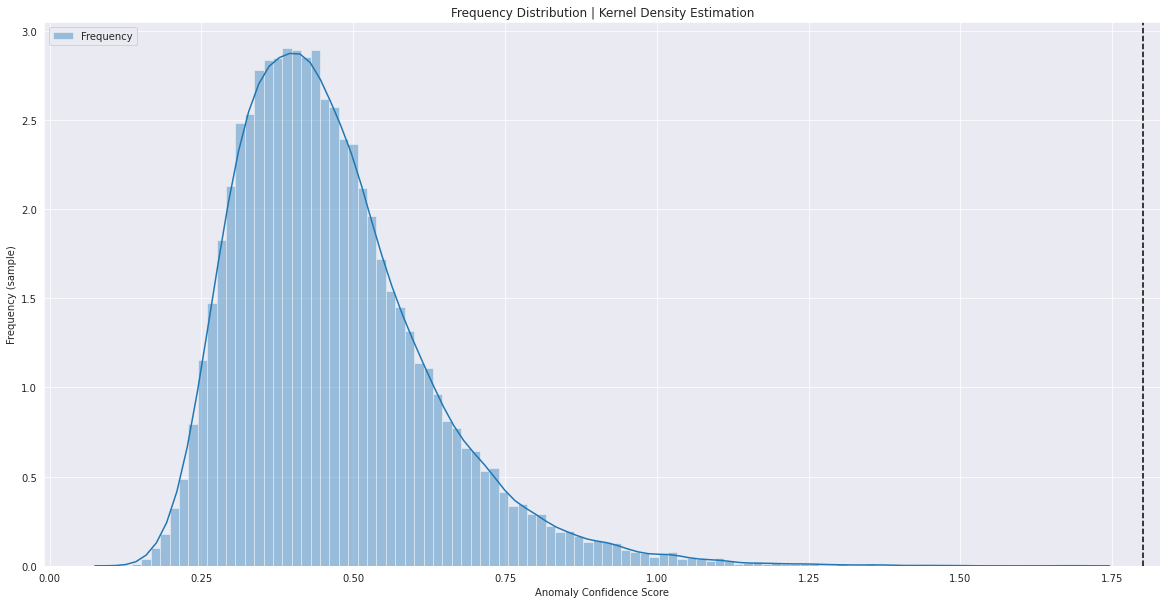

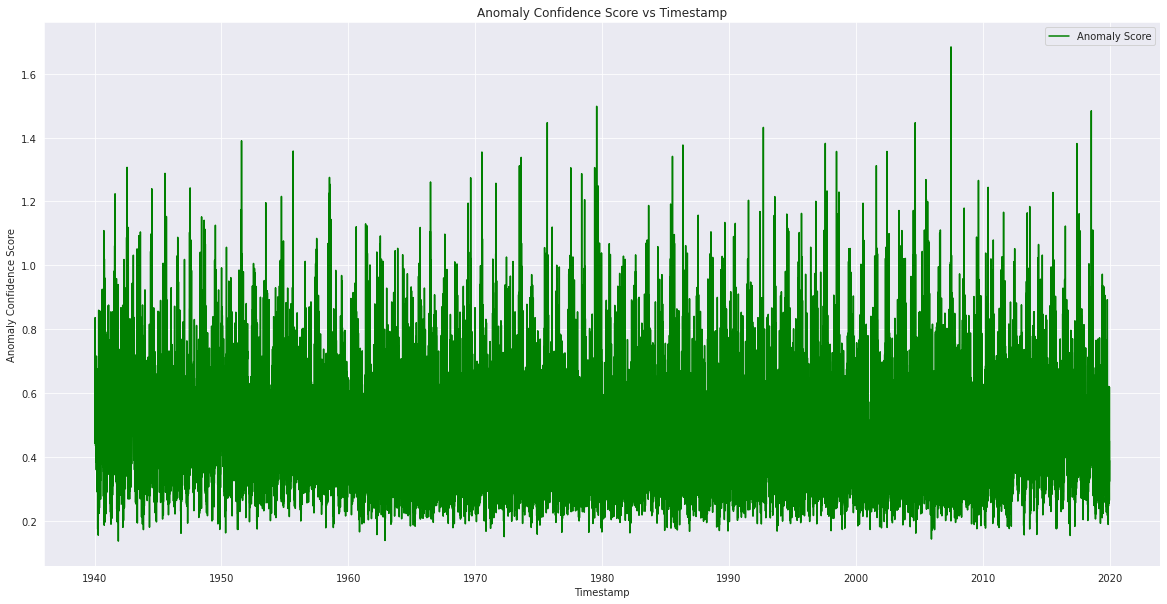

In [21]:
Anamoly.plot_anamoly_results(loss_df=loss_df)

# Intepretable results of predictions from the anomaly detector - DeepCNN
### Input: Prediction Results for which row (specific_prediction_sample_to_explain), Window Difference (input_label_index_value)
### Possible Modes: Individual Instance Explainable Results, Batch of data Explainable Results

Epoch 1/30
29211/29211 [==============================] - 0s - loss: 1.5457     
Epoch 2/30
29211/29211 [==============================] - 0s - loss: 0.1209     
Epoch 3/30
29211/29211 [==============================] - 0s - loss: 0.0673     
Epoch 4/30
29211/29211 [==============================] - 0s - loss: 0.0585     
Epoch 5/30
29211/29211 [==============================] - 0s - loss: 0.0540     
Epoch 6/30
29211/29211 [==============================] - 0s - loss: 0.0511     
Epoch 7/30
29211/29211 [==============================] - 0s - loss: 0.0479     
Epoch 8/30
29211/29211 [==============================] - 0s - loss: 0.0436     
Epoch 9/30
29211/29211 [==============================] - 0s - loss: 0.0388     
Epoch 10/30
29211/29211 [==============================] - 0s - loss: 0.0342     
Epoch 11/30
29211/29211 [==============================] - 0s - loss: 0.0309     
Epoch 12/30
29211/29211 [==============================] - 0s - loss: 0.0285     
Epoch 13/30
29211/29211 [


Current Label Shown: window_diff_16



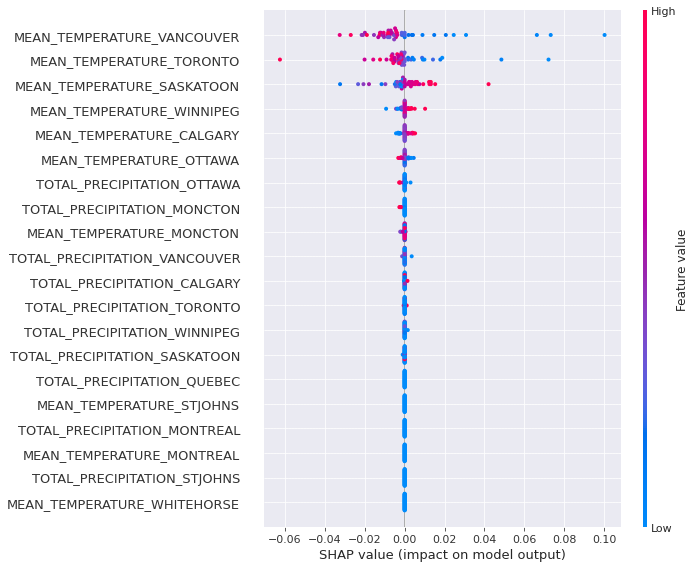

Current Label Shown: window_diff_16



In [28]:
Anamoly.explainable_results(X=anamoly_data, Y=Y, specific_prediction_sample_to_explain=10,input_label_index_value=16, num_labels=26)

# Selecting the deep models, time window size, kernel size
### Available models - Deep Convolutional Neural Network, LSTM AUTOENCODERS
### Possible Values ['deepcnn', 'lstmaenn']

In [24]:
MODEL_SELECTED, LOOKBACK_SIZE, KERNEL_SIZE = Anamoly.set_config(MODEL_SELECTED='lstmaenn', LOOKBACK_SIZE=10, KERNEL_SIZE=3)

MODEL_SELECTED = lstmaenn
LOOKBACK_SIZE = 10
KERNEL_SIZE = 3


# Training the selected ANOMALY detector model
### It will use GPU if available other CPU
### LSTMAENN example

In [25]:
loss, train_data, model = Anamoly.compute(X, Y, LOOKBACK_SIZE=10, num_of_numerical_features=26, MODEL_SELECTED=MODEL_SELECTED, KERNEL_SIZE=KERNEL_SIZE, epocs=30)

cuda
LSTMAENN(
  (lstm_1_layer): LSTM(26, 128)
  (dropout_1_layer): Dropout(p=0.2, inplace=False)
  (lstm_2_layer): LSTM(128, 64)
  (dropout_2_layer): Dropout(p=0.2, inplace=False)
  (lstm_3_layer): LSTM(64, 64)
  (dropout_3_layer): Dropout(p=0.2, inplace=False)
  (lstm_4_layer): LSTM(64, 128)
  (dropout_4_layer): Dropout(p=0.2, inplace=False)
  (linear_layer): Linear(in_features=128, out_features=26, bias=True)
)
Training Loss: 0.11337318036170739 - Epoch: 1
Training Loss: 0.040731675847385566 - Epoch: 2
Training Loss: 0.030802809213046373 - Epoch: 3
Training Loss: 0.02402795526440799 - Epoch: 4
Training Loss: 0.0200956804394265 - Epoch: 5
Training Loss: 0.017264768856129764 - Epoch: 6
Training Loss: 0.015078987489655402 - Epoch: 7
Training Loss: 0.013330261429072014 - Epoch: 8
Training Loss: 0.011942417131326807 - Epoch: 9
Training Loss: 0.01079903225295107 - Epoch: 10
Training Loss: 0.00982664010578283 - Epoch: 11
Training Loss: 0.00901402490772511 - Epoch: 12
Training Loss: 0.00834

# Finding Anomalies
### LSTMAENN example

In [26]:
loss_df = Anamoly.find_anamoly(loss=loss, T=timesteps)

# Plotting Samples with confidence score
### LSTMAENN example

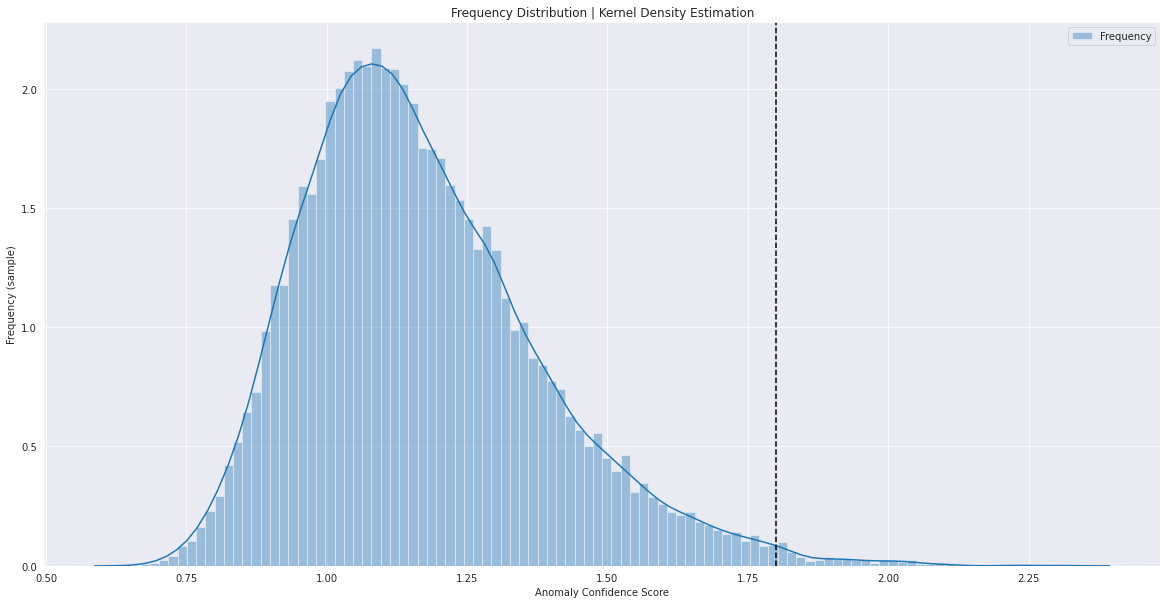

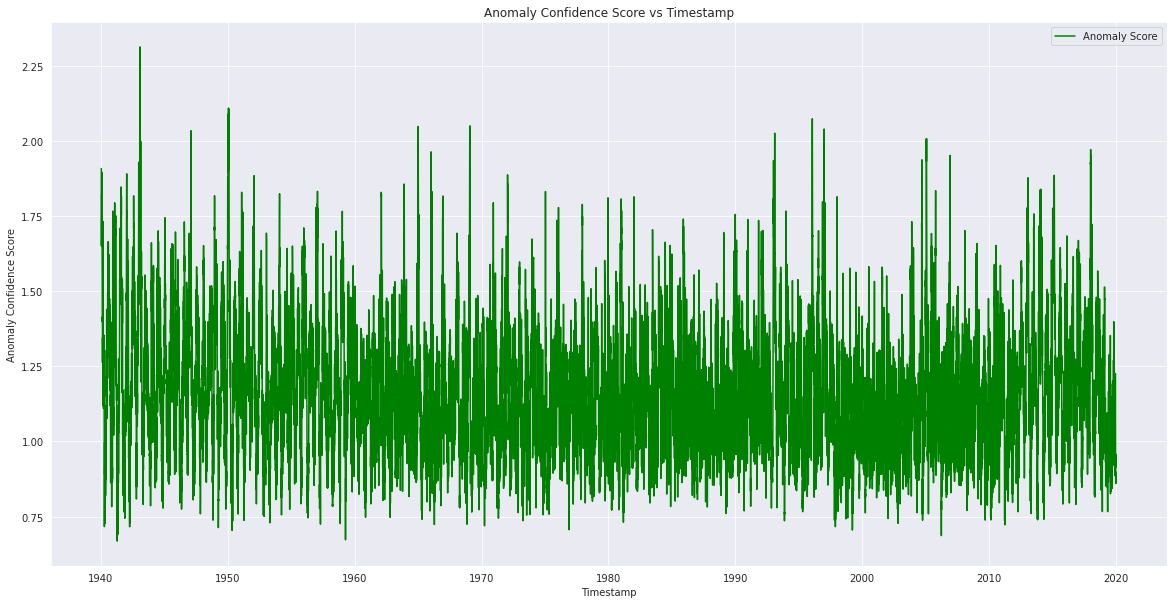

In [27]:
Anamoly.plot_anamoly_results(loss_df=loss_df)

# Intepretable results of predictions from the anomaly detector - LSTMAENN
### Input: Prediction Results for which row (specific_prediction_sample_to_explain), Window Difference (input_label_index_value)
### Possible Modes: Individual Instance Explainable Results, Batch of data Explainable Results

Epoch 1/30
29211/29211 [==============================] - 0s - loss: 1.5938     
Epoch 2/30
29211/29211 [==============================] - 0s - loss: 0.1411     
Epoch 3/30
29211/29211 [==============================] - 0s - loss: 0.0663     
Epoch 4/30
29211/29211 [==============================] - 0s - loss: 0.0556     
Epoch 5/30
29211/29211 [==============================] - 0s - loss: 0.0500     
Epoch 6/30
29211/29211 [==============================] - 0s - loss: 0.0468     
Epoch 7/30
29211/29211 [==============================] - 0s - loss: 0.0436     
Epoch 8/30
29211/29211 [==============================] - 0s - loss: 0.0411     
Epoch 9/30
29211/29211 [==============================] - 0s - loss: 0.0385     
Epoch 10/30
29211/29211 [==============================] - 0s - loss: 0.0372     
Epoch 11/30
29211/29211 [==============================] - 0s - loss: 0.0357     
Epoch 12/30
29211/29211 [==============================] - 0s - loss: 0.0341     
Epoch 13/30
29211/29211 [


Current Label Shown: window_diff_4



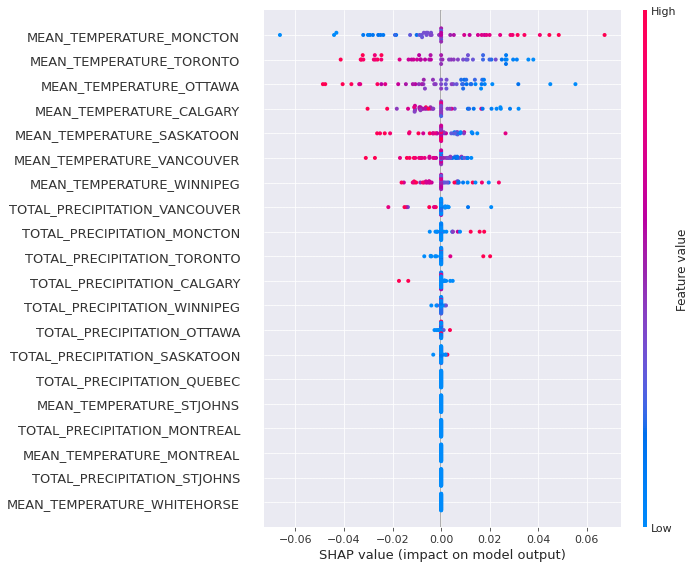

Current Label Shown: window_diff_4



In [30]:
Anamoly.explainable_results(X=anamoly_data, Y=Y, specific_prediction_sample_to_explain=200,input_label_index_value=4, num_labels=26)